## CalPred model introduction
As PGSs are increasingly applied to individuals of diverse contexts, people are aware that 

$$ 
y_i \sim \mathcal{N} (\mu(\mathbf{c}_i ),\sigma^2 (\mathbf{c}_i )),i=1,…,N
$$
where 
$$
\mu(\mathbf{c}_i)=\mathbf{c}_i^\top \boldsymbol{\beta}_\mu, \sigma^2 (\mathbf{c}_i )=\exp⁡(\mathbf{c}_i^\top\boldsymbol{\beta}_\sigma).
$$



## Applying CalPred to a simulated dataset

In [1]:
source("calpred.R")
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
n_indiv <- 10000
n_covar <- 5
covar <- matrix(rnorm(n_indiv * n_covar), nrow=n_indiv, ncol=n_covar)
rownames(covar) <- paste("indiv", 1:n_indiv, sep="")
colnames(covar) <- paste("covar", 1:n_covar, sep="")
mean_vars = sd_vars = covar
mean_coef <- rnorm(n_covar)
sd_coef <- rnorm(n_covar) * 0.1

sim_data <- simulate(mean_vars=covar, sd_vars=covar, mean_coef=mean_coef, sd_coef=sd_coef)
fit <- train(mean_vars=covar, sd_vars=covar, y=sim_data$y)
pred <- predict(mean_vars=covar, sd_vars=covar, mean_coef=fit$mean_coef, sd_coef=fit$sd_coef)

# Quality of parameter fit

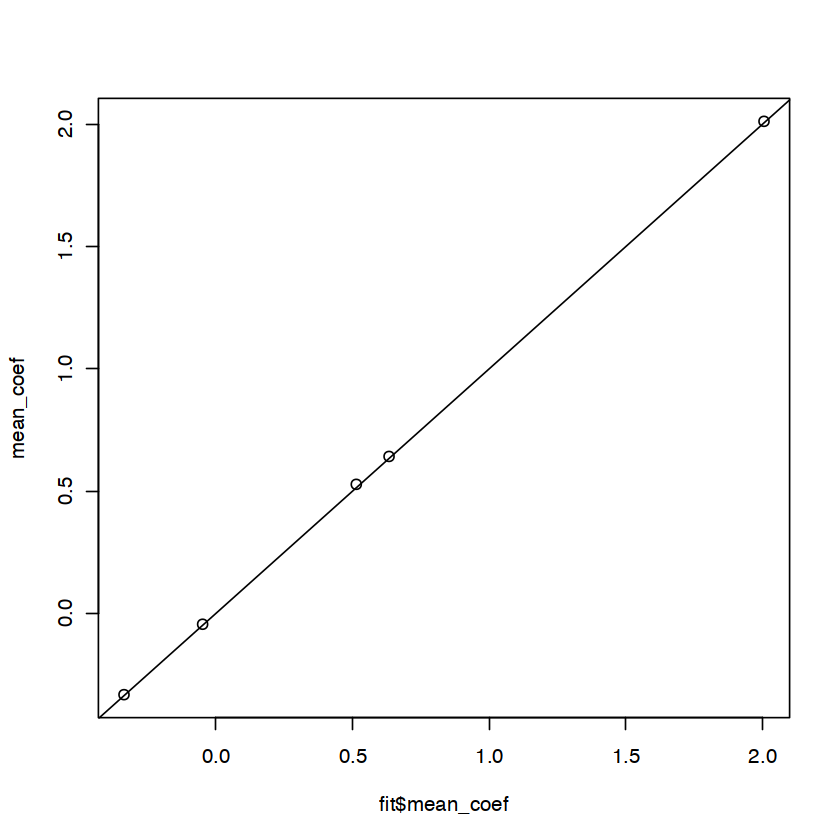

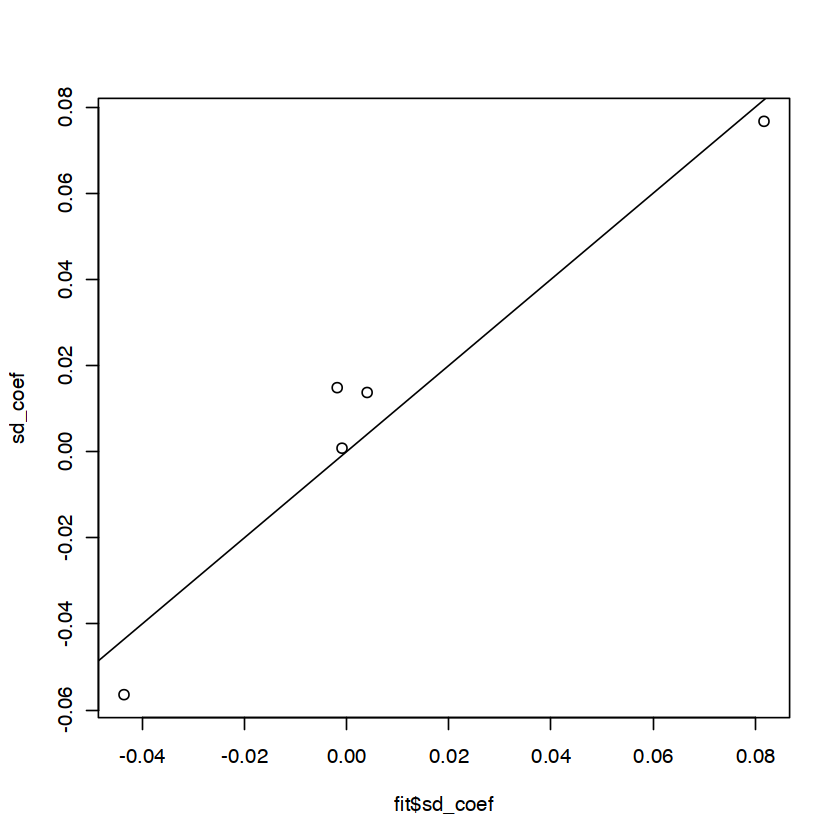

In [3]:
plot(fit$mean_coef, mean_coef)
abline(coef = c(0,1))

plot(fit$sd_coef, sd_coef)
abline(coef = c(0,1))

# Computing statistics of prediction performance

In [4]:
stats <- compute_stats(y=sim_data$y, pred=pred$mean, predstd=pred$sd, group=cut_number(sd_vars[, 'covar1'], 5), n_bootstrap=100)

stats$stats

group,r2,coverage,length
<fct>,<dbl>,<dbl>,<dbl>
"[-3.51,-0.822]",0.8249445,0.9040,1.0022768
"(-0.822,-0.251]",0.8134266,0.8850,1.0005377
"(-0.251,0.276]",0.8201934,0.8910,1.0003353
"(0.276,0.869]",0.8188791,0.9010,0.9993778
"(0.869,4.27]",0.8230916,0.9015,1.0008237


## Plotting bootstrap samples

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


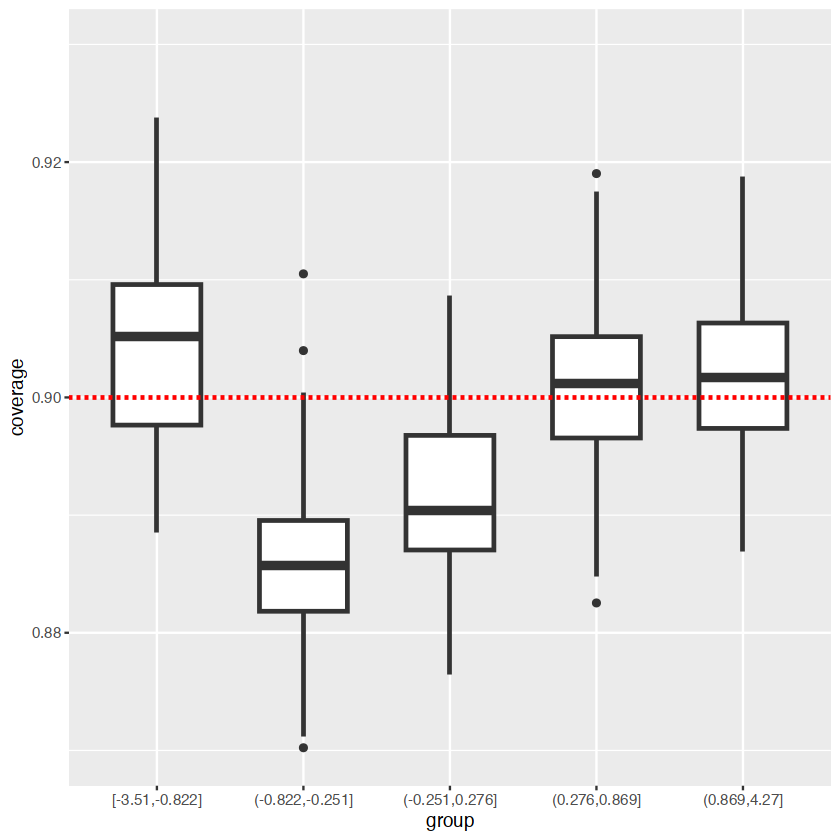

In [5]:
bs_df <- stats$bootstrap_stats
ggplot(bs_df, aes(x=group,y=coverage)) +
  geom_boxplot(size=1, width = 0.6) +
  geom_hline(yintercept=0.9, linetype="dashed", color = "red", linewidth=1) +
  lims(y=c(0.87, 0.93))

In [6]:
normalize_table <- function(x) {
    return (data.frame(
        q = qnorm((rank(x) - 0.5) / length(x)),
        x = x
    ))
}